In [1]:
pip install pandas numpy matplotlib scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

X = data.data
y = data.target

print(data.target_names)   # malignant / benign

['malignant' 'benign']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  2]
 [ 1 70]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [10]:
y_prob = model.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_score)

ROC-AUC: 0.99737962659679


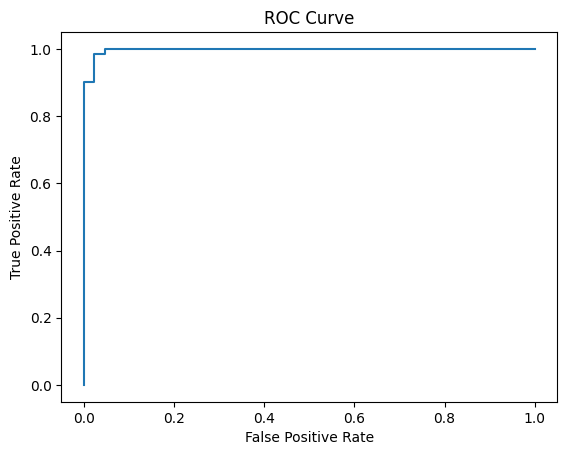

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()